# Implementing a Random Forest Model

The analyis include three datasets, one for cultivation, msavi and weather data sets. To complete the project, I will carry out the following steps
* Data Preprocessing: This involves data wrangling activities including: 1. entry of the data into python, 2. extracting data from columns using regex, 3. merging the data from different datasets, 4. selecting variables to include in the random forest model, 5. normalizing the variables to minimize feature bias
* Implementing Random Forest Model
* Evaluating Random Forest Model through Mean Squared Error, Accuracy score and Visualization Techniques.
* Determining the important features for the prediction of yields

In [1]:
# Importing files into python
#importing data into python
import pandas as pd
path_cultivation = "C:/Users/Admin/Downloads/interview_task/cultivations.csv"
path_msavi = "C:/Users/Admin/Downloads/interview_task/msavi_mean.csv"
path_weather = "C:/Users/Admin/Downloads/interview_task/weather.csv"

In [2]:
#Importing cultivation
cultivation = pd.read_csv(path_cultivation)
cultivation.head()

,Unnamed: 0,created_at,cultivation_id,cultivation_name,harvest date,grow start date,yield
0,0,20:04.3,18902,A,00:00.0,04/04/2019,52.4
1,1,20:09.1,18932,B,00:00.0,11/14/18,138.5
2,3,20:21.6,19009,C,00:00.0,00:00.0,72.6
3,5,20:25.0,19030,D,00:00.0,00:00.0,103.6
4,7,20:40.9,19129,E,00:00.0,00:00.0,141.0


From the analysis, we not that there are 5 types of cultuvations with different yields. The harvest date and grow start date are incomplete

In [3]:
#importing msavi
msavi = pd.read_csv(path_msavi)
msavi.head()

,Unnamed: 0,observation_date,meta_data,cultivation_id,data_value
0,0,23/10/2019 16:06,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN
1,1,27/06/2020 16:15,"{'pixel_count': 3636, 'unmasked_count': 3636.0...",18932,0.63542
2,2,23/10/2019 16:06,"{'pixel_count': 1546, 'unmasked_count': 0.0, '...",19009,NaN
3,3,02/06/2020 16:16,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN
4,4,23/10/2019 16:06,"{'pixel_count': 3356, 'unmasked_count': 0.0, '...",19030,NaN


From the first five columns we note that the data_value column has NaN values. The cultivation_id can be used to know the type of cultivation. meta_data column has no NaN values however, it was captured in dictonary format. Therefore, there is need to extract the data using regex from the meta_data. Additionally, there is an observation date which is captured in dd/mm/yyyy hh:mm format.

In [4]:
# importing weather
weather = pd.read_csv(path_weather)
weather.head()

,Unnamed: 0,observation_date,weather_data,cultivation_id
0,0,17/08/2018 04:00,"{'et': 5.000000000000001, 'prcp': 0.0, 'tmax':...",1912
1,1,16/08/2018 04:00,"{'et': 4.8900000000000015, 'prcp': 50.73, 'tma...",1912
2,2,15/08/2018 04:00,"{'et': 4.380000000000001, 'prcp': 37.83, 'tmax...",1912
3,3,14/08/2018 04:00,"{'et': 4.05, 'prcp': 4.41, 'tmax': 35.9, 'tmin...",1912
4,4,13/08/2018 04:00,"{'et': 4.81, 'prcp': 0.77, 'tmax': 34.7, 'tmin...",1912


# Data Cleaning

Similarly, the weather dataset has cultivation_id that can be used to identify the specific cultivation. Additionally, there is an observation date for the different weather pattern. weather_data column is also captured in dictonary format that needs some extraction

We use regex to clean the data. We note the pattern of the two columns (weather_data and meta_data) is begins with {, variable name, :, space, value, then comma up to the last variable where is closed with }. I created a dataframe in which I used split function and expand into columns. The regex pattern applied splited the column based on space,'}', or ','. 

In [5]:
# importing regex
import re

In [6]:
# data cleaning for msavi_mean dataset 'meta_data' column
df1=msavi['meta_data'].str.split('\s|}|,', expand=True)
df1.head()

,0,1,2,3,4,5,6,7,8
0,{'pixel_count':,1088,,'unmasked_count':,0.0,,'unmasked_fraction':,0.0,
1,{'pixel_count':,3636,,'unmasked_count':,3636.0,,'unmasked_fraction':,1.0,
2,{'pixel_count':,1546,,'unmasked_count':,0.0,,'unmasked_fraction':,0.0,
3,{'pixel_count':,1088,,'unmasked_count':,0.0,,'unmasked_fraction':,0.0,
4,{'pixel_count':,3356,,'unmasked_count':,0.0,,'unmasked_fraction':,0.0,


In [7]:
# selecting columns with data
df1=df1[[1,4,7]]
df1.head()

,1,4,7
0,1088,0.0,0.0
1,3636,3636.0,1.0
2,1546,0.0,0.0
3,1088,0.0,0.0
4,3356,0.0,0.0


In [8]:
# renaming the column headers with correct column names
df1.rename(columns = {1:'pixel_count', 4:'unmasked_count',7:'unmasked_fraction'}, inplace = True)
df1.head()

,pixel_count,unmasked_count,unmasked_fraction
0,1088,0.0,0.0
1,3636,3636.0,1.0
2,1546,0.0,0.0
3,1088,0.0,0.0
4,3356,0.0,0.0


In [9]:
# combining the extracted data with original msavi_mean dataset
msavi_final = pd.concat([msavi, df1], axis=1, join="inner")
msavi_final.head()

,Unnamed: 0,observation_date,meta_data,cultivation_id,data_value,pixel_count,unmasked_count,unmasked_fraction
0,0,23/10/2019 16:06,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0
1,1,27/06/2020 16:15,"{'pixel_count': 3636, 'unmasked_count': 3636.0...",18932,0.63542,3636,3636.0,1.0
2,2,23/10/2019 16:06,"{'pixel_count': 1546, 'unmasked_count': 0.0, '...",19009,NaN,1546,0.0,0.0
3,3,02/06/2020 16:16,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0
4,4,23/10/2019 16:06,"{'pixel_count': 3356, 'unmasked_count': 0.0, '...",19030,NaN,3356,0.0,0.0


Additionally, I extracted the observation date from the dataset. The current observation date is represented as dd/mm/yyyy hh:mm format. I retrieved the date using the regex pattern dd/mm/yyyy and placed it in a new column of date_observation

In [10]:
# extracting date from msavi mean data set
msavi_final['date_observation']=msavi_final['observation_date'].str.extract('(../../....)', expand=True)
msavi_final.head()

,Unnamed: 0,observation_date,meta_data,cultivation_id,data_value,pixel_count,unmasked_count,unmasked_fraction,date_observation
0,0,23/10/2019 16:06,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,23/10/2019
1,1,27/06/2020 16:15,"{'pixel_count': 3636, 'unmasked_count': 3636.0...",18932,0.63542,3636,3636.0,1.0,27/06/2020
2,2,23/10/2019 16:06,"{'pixel_count': 1546, 'unmasked_count': 0.0, '...",19009,NaN,1546,0.0,0.0,23/10/2019
3,3,02/06/2020 16:16,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,02/06/2020
4,4,23/10/2019 16:06,"{'pixel_count': 3356, 'unmasked_count': 0.0, '...",19030,NaN,3356,0.0,0.0,23/10/2019


Similarly, I extracted the weather features from the weather_data column using regex pattern applied splited the column based on space,'}', or ','.

In [11]:
# creating dataframe df2 to store the cleaned 'weather_data' information.
# using regex to split the column
df2=weather['weather_data'].str.split('\s|}|,', expand=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,{'et':,5.000000000000001,,'prcp':,0.0,,'tmax':,35.7,,'tmin':,...,,'smi_5':,0.8973333333333331,,'smi_15':,0.8805000000000001,,'smi_50':,0.5275,
1,{'et':,4.8900000000000015,,'prcp':,50.73,,'tmax':,35.0,,'tmin':,...,,'smi_5':,0.9405,,'smi_15':,0.9336249999999998,,'smi_50':,0.4948750000000002,
2,{'et':,4.380000000000001,,'prcp':,37.83,,'tmax':,33.3,,'tmin':,...,,'smi_5':,1.0408750000000004,,'smi_15':,0.9990000000000001,,'smi_50':,0.4672916666666666,
3,{'et':,4.05,,'prcp':,4.41,,'tmax':,35.9,,'tmin':,...,,'smi_5':,0.9459166666666668,,'smi_15':,0.8290416666666668,,'smi_50':,0.448625,
4,{'et':,4.81,,'prcp':,0.77,,'tmax':,34.7,,'tmin':,...,,'smi_5':,1.015125,,'smi_15':,0.8282916666666668,,'smi_50':,0.4458749999999999,


In [12]:
# set the max columns to none to view all of the columns
pd.set_option('display.max_columns', None)

In [13]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,{'et':,5.000000000000001,,'prcp':,0.0,,'tmax':,35.7,,'tmin':,24.6,,'gdd12':,17.129166666666666,,'smi_5':,0.8973333333333331,,'smi_15':,0.8805000000000001,,'smi_50':,0.5275,
1,{'et':,4.8900000000000015,,'prcp':,50.73,,'tmax':,35.0,,'tmin':,24.8,,'gdd12':,17.10416666666667,,'smi_5':,0.9405,,'smi_15':,0.9336249999999998,,'smi_50':,0.4948750000000002,
2,{'et':,4.380000000000001,,'prcp':,37.83,,'tmax':,33.3,,'tmin':,24.6,,'gdd12':,16.362500000000004,,'smi_5':,1.0408750000000004,,'smi_15':,0.9990000000000001,,'smi_50':,0.4672916666666666,
3,{'et':,4.05,,'prcp':,4.41,,'tmax':,35.9,,'tmin':,23.4,,'gdd12':,15.345833333333333,,'smi_5':,0.9459166666666668,,'smi_15':,0.8290416666666668,,'smi_50':,0.448625,
4,{'et':,4.81,,'prcp':,0.77,,'tmax':,34.7,,'tmin':,23.4,,'gdd12':,16.299999999999994,,'smi_5':,1.015125,,'smi_15':,0.8282916666666668,,'smi_50':,0.4458749999999999,


In [14]:
# selecting columns with data 
df2=df2[[1,4,7,10,13,16,19,22]]
df2.head()

,1,4,7,10,13,16,19,22
0,5.000000000000001,0.0,35.7,24.6,17.129166666666666,0.8973333333333331,0.8805000000000001,0.5275
1,4.8900000000000015,50.73,35.0,24.8,17.10416666666667,0.9405,0.9336249999999998,0.4948750000000002
2,4.380000000000001,37.83,33.3,24.6,16.362500000000004,1.0408750000000004,0.9990000000000001,0.4672916666666666
3,4.05,4.41,35.9,23.4,15.345833333333333,0.9459166666666668,0.8290416666666668,0.448625
4,4.81,0.77,34.7,23.4,16.299999999999994,1.015125,0.8282916666666668,0.4458749999999999


In [15]:
# renaming the columns
df2.rename(columns = {1:'et', 4:'prcp',7:'tmax',10:'tmin',13:'gdd12',16:'smi_5',19:'smi15',22:'smi50'}, inplace = True)
df2.head()

,et,prcp,tmax,tmin,gdd12,smi_5,smi15,smi50
0,5.000000000000001,0.0,35.7,24.6,17.129166666666666,0.8973333333333331,0.8805000000000001,0.5275
1,4.8900000000000015,50.73,35.0,24.8,17.10416666666667,0.9405,0.9336249999999998,0.4948750000000002
2,4.380000000000001,37.83,33.3,24.6,16.362500000000004,1.0408750000000004,0.9990000000000001,0.4672916666666666
3,4.05,4.41,35.9,23.4,15.345833333333333,0.9459166666666668,0.8290416666666668,0.448625
4,4.81,0.77,34.7,23.4,16.299999999999994,1.015125,0.8282916666666668,0.4458749999999999


In [16]:
# joining the two datasets
weather_final = pd.concat([weather, df2], axis=1, join="inner")
weather_final.head()

,Unnamed: 0,observation_date,weather_data,cultivation_id,et,prcp,tmax,tmin,gdd12,smi_5,smi15,smi50
0,0,17/08/2018 04:00,"{'et': 5.000000000000001, 'prcp': 0.0, 'tmax':...",1912,5.000000000000001,0.0,35.7,24.6,17.129166666666666,0.8973333333333331,0.8805000000000001,0.5275
1,1,16/08/2018 04:00,"{'et': 4.8900000000000015, 'prcp': 50.73, 'tma...",1912,4.8900000000000015,50.73,35.0,24.8,17.10416666666667,0.9405,0.9336249999999998,0.4948750000000002
2,2,15/08/2018 04:00,"{'et': 4.380000000000001, 'prcp': 37.83, 'tmax...",1912,4.380000000000001,37.83,33.3,24.6,16.362500000000004,1.0408750000000004,0.9990000000000001,0.4672916666666666
3,3,14/08/2018 04:00,"{'et': 4.05, 'prcp': 4.41, 'tmax': 35.9, 'tmin...",1912,4.05,4.41,35.9,23.4,15.345833333333333,0.9459166666666668,0.8290416666666668,0.448625
4,4,13/08/2018 04:00,"{'et': 4.81, 'prcp': 0.77, 'tmax': 34.7, 'tmin...",1912,4.81,0.77,34.7,23.4,16.299999999999994,1.015125,0.8282916666666668,0.4458749999999999


In [17]:
# extracting date in weather dataset
weather_final['date_observation']=weather_final['observation_date'].str.extract('(../../....)', expand=True)
weather_final.head()

,Unnamed: 0,observation_date,weather_data,cultivation_id,et,prcp,tmax,tmin,gdd12,smi_5,smi15,smi50,date_observation
0,0,17/08/2018 04:00,"{'et': 5.000000000000001, 'prcp': 0.0, 'tmax':...",1912,5.000000000000001,0.0,35.7,24.6,17.129166666666666,0.8973333333333331,0.8805000000000001,0.5275,17/08/2018
1,1,16/08/2018 04:00,"{'et': 4.8900000000000015, 'prcp': 50.73, 'tma...",1912,4.8900000000000015,50.73,35.0,24.8,17.10416666666667,0.9405,0.9336249999999998,0.4948750000000002,16/08/2018
2,2,15/08/2018 04:00,"{'et': 4.380000000000001, 'prcp': 37.83, 'tmax...",1912,4.380000000000001,37.83,33.3,24.6,16.362500000000004,1.0408750000000004,0.9990000000000001,0.4672916666666666,15/08/2018
3,3,14/08/2018 04:00,"{'et': 4.05, 'prcp': 4.41, 'tmax': 35.9, 'tmin...",1912,4.05,4.41,35.9,23.4,15.345833333333333,0.9459166666666668,0.8290416666666668,0.448625,14/08/2018
4,4,13/08/2018 04:00,"{'et': 4.81, 'prcp': 0.77, 'tmax': 34.7, 'tmin...",1912,4.81,0.77,34.7,23.4,16.299999999999994,1.015125,0.8282916666666668,0.4458749999999999,13/08/2018


# Joining cultivation, msavi and weather dataset

I joined the three datasets to perform analysis. The msavi and weather datasets provides timeseries data for each cultivation. I merge the data sets using the date of observation and the cultivation. id. The yields are represented in the cultivataion dataset. Each cultivation has its own yield. Since the yield is on each cultivation, it will be easier to predict each cultivation using random forest classification model. 

In [18]:
#joining weather and msavi tables using observation dates
join_table = pd.merge(msavi_final, weather_final, on = ['date_observation','cultivation_id'])
join_table.head()

,Unnamed: 0_x,observation_date_x,meta_data,cultivation_id,data_value,pixel_count,unmasked_count,unmasked_fraction,date_observation,Unnamed: 0_y,observation_date_y,weather_data,et,prcp,tmax,tmin,gdd12,smi_5,smi15,smi50
0,0,23/10/2019 16:06,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,23/10/2019,2150,23/10/2019 04:00,"{'et': 3.2, 'prcp': 0.6, 'tmax': 36.6, 'tmin':...",3.2,0.6,36.6,22.4,15.045833333333334,0.4003333333333333,0.08879166666666667,0.016750000000000008
1,1863,23/10/2019 16:06,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,23/10/2019,2150,23/10/2019 04:00,"{'et': 3.2, 'prcp': 0.6, 'tmax': 36.6, 'tmin':...",3.2,0.6,36.6,22.4,15.045833333333334,0.4003333333333333,0.08879166666666667,0.016750000000000008
2,1,27/06/2020 16:15,"{'pixel_count': 3636, 'unmasked_count': 3636.0...",18932,0.635420,3636,3636.0,1.0,27/06/2020,3498,27/06/2020 04:00,"{'et': 6.209999999999999, 'prcp': 0.0, 'tmax':...",6.209999999999999,0.0,41.1,24.4,19.245833333333326,0.231,0.35025,0.0711666666666667
3,209,27/06/2020 15:49,"{'pixel_count': 1651, 'unmasked_count': 1651.0...",18932,0.673505,1651,1651.0,1.0,27/06/2020,3498,27/06/2020 04:00,"{'et': 6.209999999999999, 'prcp': 0.0, 'tmax':...",6.209999999999999,0.0,41.1,24.4,19.245833333333326,0.231,0.35025,0.0711666666666667
4,1050,27/06/2020 15:49,"{'pixel_count': 1651, 'unmasked_count': 1651.0...",18932,0.673505,1651,1651.0,1.0,27/06/2020,3498,27/06/2020 04:00,"{'et': 6.209999999999999, 'prcp': 0.0, 'tmax':...",6.209999999999999,0.0,41.1,24.4,19.245833333333326,0.231,0.35025,0.0711666666666667


In [19]:
join_table=pd.merge(join_table, cultivation, on=['cultivation_id'])
join_table

,Unnamed: 0_x,observation_date_x,meta_data,cultivation_id,data_value,pixel_count,unmasked_count,unmasked_fraction,date_observation,Unnamed: 0_y,observation_date_y,weather_data,et,prcp,tmax,tmin,gdd12,smi_5,smi15,smi50,Unnamed: 0,created_at,cultivation_name,harvest date,grow start date,yield
0,0,23/10/2019 16:06,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,23/10/2019,2150,23/10/2019 04:00,"{'et': 3.2, 'prcp': 0.6, 'tmax': 36.6, 'tmin':...",3.2,0.6,36.6,22.4,15.045833333333334,0.4003333333333333,0.08879166666666667,0.016750000000000008,0,20:04.3,A,00:00.0,04/04/2019,52.4
1,1863,23/10/2019 16:06,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,23/10/2019,2150,23/10/2019 04:00,"{'et': 3.2, 'prcp': 0.6, 'tmax': 36.6, 'tmin':...",3.2,0.6,36.6,22.4,15.045833333333334,0.4003333333333333,0.08879166666666667,0.016750000000000008,0,20:04.3,A,00:00.0,04/04/2019,52.4
2,3,02/06/2020 16:16,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,02/06/2020,2427,02/06/2020 04:00,"{'et': 4.29, 'prcp': 0.37, 'tmax': 35.1, 'tmin...",4.29,0.37,35.1,22.6,14.95833333333333,0.6474583333333334,0.6737500000000001,0.012625000000000004,0,20:04.3,A,00:00.0,04/04/2019,52.4
3,990,02/06/2020 15:55,"{'pixel_count': 511, 'unmasked_count': 0.0, 'u...",18902,NaN,511,0.0,0.0,02/06/2020,2427,02/06/2020 04:00,"{'et': 4.29, 'prcp': 0.37, 'tmax': 35.1, 'tmin...",4.29,0.37,35.1,22.6,14.95833333333333,0.6474583333333334,0.6737500000000001,0.012625000000000004,0,20:04.3,A,00:00.0,04/04/2019,52.4
4,1692,02/06/2020 16:16,"{'pixel_count': 1088, 'unmasked_count': 0.0, '...",18902,NaN,1088,0.0,0.0,02/06/2020,2427,02/06/2020 04:00,"{'et': 4.29, 'prcp': 0.37, 'tmax': 35.1, 'tmin...",4.29,0.37,35.1,22.6,14.95833333333333,0.6474583333333334,0.6737500000000001,0.012625000000000004,0,20:04.3,A,00:00.0,04/04/2019,52.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,2526,10/04/2020 16:05,"{'pixel_count': 3356, 'unmasked_count': 1652.0...",19030,0.160170,3356,1652.0,0.4922526817640048,10/04/2020,5762,10/04/2020 04:00,"{'et': 5.750000000000001, 'prcp': 0.0, 'tmax':...",5.750000000000001,0.0,42.1,22.3,17.583333333333336,0.047500000000000014,0.0,0.0,5,20:25.0,D,00:00.0,00:00.0,103.6
2337,2007,25/04/2020 16:05,"{'pixel_count': 3349, 'unmasked_count': 0.0, '...",19030,NaN,3349,0.0,0.0,25/04/2020,5747,25/04/2020 04:00,"{'et': 5.300000000000002, 'prcp': 8.6900000000...",5.300000000000002,8.690000000000001,40.0,19.9,16.495833333333334,0.6059166666666668,0.0,0.0,5,20:25.0,D,00:00.0,00:00.0,103.6
2338,2015,25/02/2020 16:05,"{'pixel_count': 3349, 'unmasked_count': 3349.0...",19030,0.209118,3349,3349.0,1.0,25/02/2020,6078,25/02/2020 05:00,"{'et': 4.139999999999999, 'prcp': 0.0, 'tmax':...",4.139999999999999,0.0,35.1,15.9,12.641666666666667,0.00675,0.005416666666666668,0.0,5,20:25.0,D,00:00.0,00:00.0,103.6
2339,2019,10/02/2020 16:05,"{'pixel_count': 3349, 'unmasked_count': 3349.0...",19030,0.225834,3349,3349.0,1.0,10/02/2020,6093,10/02/2020 05:00,"{'et': 3.24, 'prcp': 0.0, 'tmax': 32.8, 'tmin'...",3.24,0.0,32.8,16.5,10.791666666666664,0.3326249999999999,0.16345833333333334,0.0,5,20:25.0,D,00:00.0,00:00.0,103.6


# Selecting Features to Include in the Random Forest Model 

* The features included from msavi dataset are the meta_data features due to the missing values in data_value column.
* The analysis included all weather features.

In [20]:
analysis_set=join_table[['pixel_count','unmasked_count','unmasked_fraction','et','prcp','tmax','tmin','gdd12','smi_5','smi15','smi50','yield']]
analysis_set

,pixel_count,unmasked_count,unmasked_fraction,et,prcp,tmax,tmin,gdd12,smi_5,smi15,smi50,yield
0,1088,0.0,0.0,3.2,0.6,36.6,22.4,15.045833333333334,0.4003333333333333,0.08879166666666667,0.016750000000000008,52.4
1,1088,0.0,0.0,3.2,0.6,36.6,22.4,15.045833333333334,0.4003333333333333,0.08879166666666667,0.016750000000000008,52.4
2,1088,0.0,0.0,4.29,0.37,35.1,22.6,14.95833333333333,0.6474583333333334,0.6737500000000001,0.012625000000000004,52.4
3,511,0.0,0.0,4.29,0.37,35.1,22.6,14.95833333333333,0.6474583333333334,0.6737500000000001,0.012625000000000004,52.4
4,1088,0.0,0.0,4.29,0.37,35.1,22.6,14.95833333333333,0.6474583333333334,0.6737500000000001,0.012625000000000004,52.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2336,3356,1652.0,0.4922526817640048,5.750000000000001,0.0,42.1,22.3,17.583333333333336,0.047500000000000014,0.0,0.0,103.6
2337,3349,0.0,0.0,5.300000000000002,8.690000000000001,40.0,19.9,16.495833333333334,0.6059166666666668,0.0,0.0,103.6
2338,3349,3349.0,1.0,4.139999999999999,0.0,35.1,15.9,12.641666666666667,0.00675,0.005416666666666668,0.0,103.6
2339,3349,3349.0,1.0,3.24,0.0,32.8,16.5,10.791666666666664,0.3326249999999999,0.16345833333333334,0.0,103.6


Now selecting the predictors and response variables and converting to numpy arrays

In [21]:
# using numpy to convert to array
import numpy as np
# Putting response variable to y
y = np.array(analysis_set['yield'])
# Putting feature variable to X
x = analysis_set.drop('yield',axis=1)
# saving feature names
feature_list = list(x.columns)
# converting features into array
x = np.array(x)

I normalized the variables because of the huge difference among the feature variables to avoid bias.

In [22]:
# normalizing the features before training and testing the random forest model
from sklearn import preprocessing
X = preprocessing.normalize(x)
X

array([[9.99123234e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.67630822e-04, 8.15384349e-05, 1.53817226e-05],
       [9.99123234e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.67630822e-04, 8.15384349e-05, 1.53817226e-05],
       [9.99162217e-01, 0.00000000e+00, 0.00000000e+00, ...,
        5.94591823e-04, 6.18736713e-04, 1.15941388e-05],
       ...,
       [7.07080575e-01, 7.07080575e-01, 2.11131853e-04, ...,
        1.42514001e-06, 1.14363087e-06, 0.00000000e+00],
       [7.07083516e-01, 7.07083516e-01, 2.11132731e-04, ...,
        7.02280246e-05, 3.45114043e-05, 0.00000000e+00],
       [7.07083613e-01, 7.07083613e-01, 2.10692376e-04, ...,
        7.00815514e-05, 3.44394246e-05, 0.00000000e+00]])

In [23]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1638, 11), (703, 11))

# Implementing Random Forest Regressor

In [24]:
# importing the libraries from sk learn
from sklearn.ensemble import RandomForestRegressor

# instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# training the model using training set
rf.fit(X_train,y_train);

In [25]:
# making predictions using test set
y_pred = rf.predict(X_test)

# calculating absolute errors

errors = abs(y_pred-y_test)

# Testing the Performance

In [26]:
# testing model performance

# importing regression metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
# calculating the performance of the random forest model

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)

Mean Absolute Error:  3.7502968705552346
Mean Squared Error:  65.78253457941655


In [27]:
# calculating mean absolute percentage error (MAPE)
mape = 100 * (errors/y_test)

# calculating accuracy
accuracy = 100 - np.mean(mape)

print ( 'Accuracy: ', round(accuracy,2), "%")

Accuracy:  95.93 %


# Visualizing the Model

Visualization of the model helps in examining the decision trees in the random forest model. I selected one tree and saved the whole tree as an image

In [28]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

In [29]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [30]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [31]:
# Write graph to a png file
graph.write_png('tree.png')

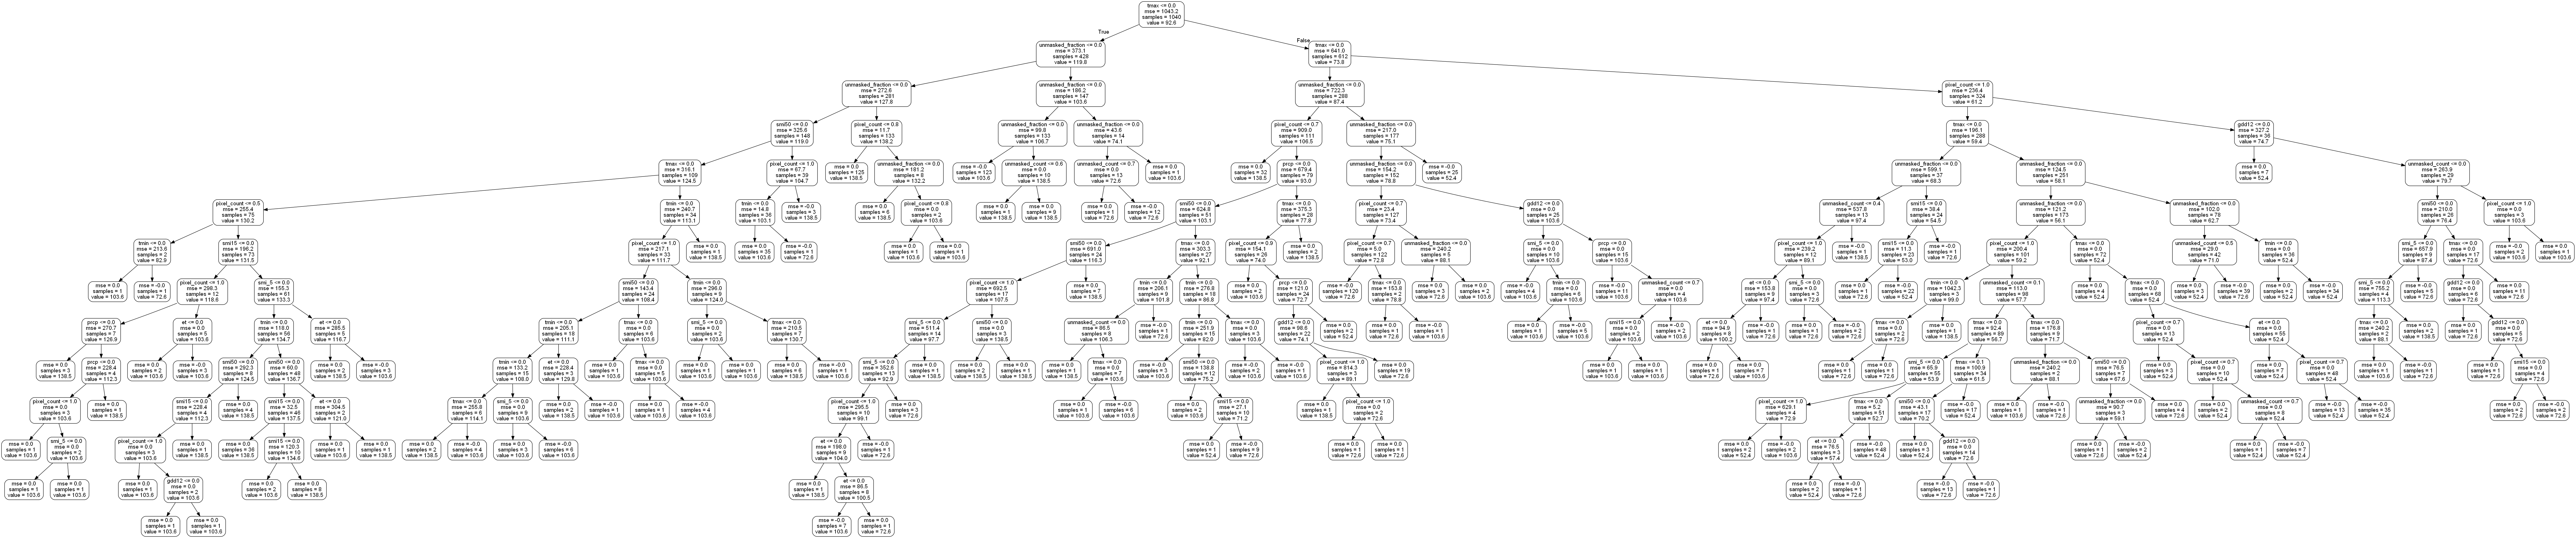

# Evaluating Feature Importance

In [32]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tmax                 Importance: 0.62
Variable: unmasked_fraction    Importance: 0.21
Variable: pixel_count          Importance: 0.04
Variable: unmasked_count       Importance: 0.03
Variable: smi50                Importance: 0.03
Variable: et                   Importance: 0.02
Variable: prcp                 Importance: 0.01
Variable: tmin                 Importance: 0.01
Variable: gdd12                Importance: 0.01
Variable: smi_5                Importance: 0.01
Variable: smi15                Importance: 0.01


The best predictor of yields is the maximum temperature recorded (tmax) followed with Msavi data. Therefore, I recommend implementing future models putting into consideration the maximum temperature and the satelitte images. 